In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [70]:
df = pd.read_csv('df_client.csv')
df.head()

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,0,0,2017Q2,0,7,1,581103.4591,612122.5165,589483.6484,608043.5063,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.551
1,0,0,2016Q1,0,7,1,608189.3682,581513.6158,609292.1500,NaN,...,608263.6088,605605.1646,NaN,581951.0166,608354.2362,623470.1198,591055.8212,592011.4052,572734.0028,NaN
2,0,0,2015Q4,0,7,1,626775.4450,620338.8464,NaN,NaN,...,621396.2940,NaN,NaN,590490.3620,620329.2616,NaN,626221.0887,572241.0321,NaN,NaN
3,0,0,2015Q2,0,7,1,613152.4469,595630.8819,NaN,NaN,...,589714.2432,NaN,NaN,580633.8747,576235.2813,NaN,619098.6619,578761.7137,NaN,NaN
4,0,1,2019Q1,1,9,0,615840.2415,603501.2067,587601.9393,610071.5454,...,607400.3547,570273.9177,573434.8221,572413.5987,618435.4264,587802.7283,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28224 entries, 0 to 28223
Columns: 124 entries, Country_Code to Variable_30_Y3
dtypes: float64(118), int64(5), object(1)
memory usage: 26.7+ MB


In [18]:
missing_data = df.isnull().sum().sum()
missing_data

798803

In [71]:
df_after_droppingNA = df.dropna()
df_after_droppingNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 28221
Columns: 124 entries, Country_Code to Variable_30_Y3
dtypes: float64(118), int64(5), object(1)
memory usage: 7.1+ MB


In [20]:
df_after_droppingNA

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,0,0,2017Q2,0,7,1,581103.4591,612122.5165,589483.6484,608043.5063,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.5510
6,0,2,2017Q3,3,4,1,586578.5472,597767.5476,596297.4053,624576.9225,...,609250.4600,578401.4940,578491.7596,602415.0892,605574.6103,590818.4830,587953.7487,615681.5151,588921.5041,624573.8506
11,0,3,2019Q1,5,8,1,598318.2343,598154.9287,607789.9692,570935.7226,...,603653.2317,575466.9788,597150.8603,580638.5826,593804.5288,597513.9685,598883.4067,587106.6485,602786.4569,601246.3169
12,0,3,2017Q4,5,8,1,587594.9953,571538.3274,592332.2655,594542.1079,...,567018.7133,582193.7105,572220.1793,570429.9825,614737.5108,620714.2683,618887.5801,588171.4894,590779.1602,583625.5489
13,0,4,2020Q1,6,9,0,596689.1000,582282.8368,569261.4908,595254.2208,...,578871.4891,599322.1472,591978.2383,570544.5521,623772.8727,625494.2375,600112.5120,626545.1412,587564.3935,624869.1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,0,8,2017Q3,14026,11,0,610596.8459,616263.7638,625744.8189,577978.4210,...,620002.3282,577870.3885,587856.9347,576940.4651,605202.2654,584073.8490,571739.0641,569396.2151,580500.6332,578626.8947
28215,0,8,2017Q1,14026,11,0,579632.9676,575222.9560,588303.8544,578441.5189,...,590603.7513,614501.1932,571976.7128,598436.1852,597895.1360,597079.7000,607649.4830,625644.3852,614072.3320,603718.8437
28219,1,5,2019Q3,14029,9,0,613443.8602,613837.1051,612822.9576,606593.2323,...,610030.8910,618505.1700,617951.2211,595971.9016,578062.5093,599639.0280,580449.8830,611674.9248,580422.2262,597456.6193
28220,0,18,2019Q2,14030,7,1,617117.2363,605957.6693,585445.4837,602436.1448,...,593354.5831,589754.9621,626103.7917,574046.2844,578293.7648,592496.9123,573213.7193,610247.3553,588799.7333,612401.2087


In [1]:
# self.fillna() seems not to make sense in this situation

In [72]:
df_for_analyzing = df_after_droppingNA.drop(["Country_Code","BR Code","Period","Client","Self_exclude_flag"],axis=1)
df_for_analyzing

,risk_rating,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,Variable_2_Y0,Variable_2_Y1,Variable_2_Y2,Variable_2_Y3,Variable_3_Y0,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,7,581103.4591,612122.5165,589483.6484,608043.5063,618117.8854,572286.9658,595663.8240,598484.7951,592374.2988,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.5510
6,4,586578.5472,597767.5476,596297.4053,624576.9225,610400.1604,605753.5345,611209.2289,586259.4759,598898.0024,...,609250.4600,578401.4940,578491.7596,602415.0892,605574.6103,590818.4830,587953.7487,615681.5151,588921.5041,624573.8506
11,8,598318.2343,598154.9287,607789.9692,570935.7226,573431.0200,596811.8368,605357.5262,607095.7826,624164.8055,...,603653.2317,575466.9788,597150.8603,580638.5826,593804.5288,597513.9685,598883.4067,587106.6485,602786.4569,601246.3169
12,8,587594.9953,571538.3274,592332.2655,594542.1079,614621.9685,619490.6341,598832.4615,597950.9888,595269.3189,...,567018.7133,582193.7105,572220.1793,570429.9825,614737.5108,620714.2683,618887.5801,588171.4894,590779.1602,583625.5489
13,9,596689.1000,582282.8368,569261.4908,595254.2208,606463.7905,590989.9483,597749.2575,585493.1140,590753.0613,...,578871.4891,599322.1472,591978.2383,570544.5521,623772.8727,625494.2375,600112.5120,626545.1412,587564.3935,624869.1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,11,610596.8459,616263.7638,625744.8189,577978.4210,595302.8961,575242.4635,590003.9926,599396.1280,610785.2316,...,620002.3282,577870.3885,587856.9347,576940.4651,605202.2654,584073.8490,571739.0641,569396.2151,580500.6332,578626.8947
28215,11,579632.9676,575222.9560,588303.8544,578441.5189,633517.1155,610954.9329,628636.6496,610428.0681,627049.1623,...,590603.7513,614501.1932,571976.7128,598436.1852,597895.1360,597079.7000,607649.4830,625644.3852,614072.3320,603718.8437
28219,9,613443.8602,613837.1051,612822.9576,606593.2323,640469.0138,640810.0088,590141.6743,592313.2508,595628.7787,...,610030.8910,618505.1700,617951.2211,595971.9016,578062.5093,599639.0280,580449.8830,611674.9248,580422.2262,597456.6193
28220,7,617117.2363,605957.6693,585445.4837,602436.1448,583673.7686,580667.3610,573858.2084,572530.5790,579714.1648,...,593354.5831,589754.9621,626103.7917,574046.2844,578293.7648,592496.9123,573213.7193,610247.3553,588799.7333,612401.2087


In [8]:
df_for_analyzing.describe()

,risk_rating,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,Variable_2_Y0,Variable_2_Y1,Variable_2_Y2,Variable_2_Y3,Variable_3_Y0,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
count,7485.000000,7485.000000,7485.000000,7485.000000,7.485000e+03,7.485000e+03,7.485000e+03,7.485000e+03,7.485000e+03,7.485000e+03,...,7.485000e+03,7.485000e+03,7.485000e+03,7485.000000,7485.000000,7485.000000,7.485000e+03,7.485000e+03,7.485000e+03,7.485000e+03
mean,6.901670,600425.229442,600466.613379,599928.823767,6.025824e+05,6.143250e+05,6.134783e+05,6.125113e+05,6.119803e+05,6.042725e+05,...,6.017448e+05,6.021560e+05,6.021273e+05,599212.213591,599254.966957,599649.083394,5.996864e+05,5.991648e+05,5.992115e+05,5.985399e+05
std,2.118788,19272.306196,19621.948249,19143.185339,1.543497e+05,7.430244e+04,7.424803e+04,7.088843e+04,7.006577e+04,3.518449e+04,...,2.756567e+04,2.672757e+04,2.513336e+04,18555.880246,18641.333718,19152.675057,1.901726e+04,1.876309e+04,1.930446e+04,1.928415e+04
min,1.000000,512856.318800,567677.981400,564700.729600,5.648809e+05,5.690969e+05,5.691024e+05,5.689516e+05,5.692582e+05,5.687937e+05,...,5.740852e+04,1.403870e+05,2.406058e+05,494594.984900,383576.548800,445609.123900,5.685834e+05,5.685897e+05,5.686196e+05,5.686106e+05
25%,6.000000,585067.992700,584661.053900,584532.105400,5.845566e+05,5.910523e+05,5.900602e+05,5.902330e+05,5.897505e+05,5.866245e+05,...,5.855165e+05,5.859520e+05,5.860598e+05,584030.815700,583870.955500,584269.062000,5.844110e+05,5.840210e+05,5.841281e+05,5.834211e+05
50%,7.000000,600530.709100,600270.724300,599431.914200,5.996902e+05,6.070396e+05,6.069423e+05,6.061465e+05,6.057692e+05,6.020235e+05,...,6.011813e+05,6.016605e+05,6.020195e+05,599007.426600,599351.099500,599790.132200,5.996495e+05,5.990022e+05,5.988508e+05,5.980332e+05
75%,8.000000,615080.142000,615092.610700,614621.700000,6.148433e+05,6.232079e+05,6.226635e+05,6.218591e+05,6.219009e+05,6.173952e+05,...,6.164952e+05,6.170055e+05,6.169087e+05,614262.965800,614359.551900,614641.527600,6.144282e+05,6.140680e+05,6.140984e+05,6.132994e+05
max,17.000000,987128.261300,939652.101400,902404.272100,9.971205e+06,3.452467e+06,3.502099e+06,3.339057e+06,3.200198e+06,1.319763e+06,...,1.159225e+06,1.177640e+06,1.243451e+06,889660.579300,765638.576100,967159.688500,1.080090e+06,1.170573e+06,1.282918e+06,1.288786e+06


In [22]:
df['risk_rating'].value_counts()

7     5877
6     5656
8     5162
5     4013
4     2586
9     1999
10     855
3      803
11     502
12     220
2      219
13     150
17     122
14      32
15      17
1       11
Name: risk_rating, dtype: int64

In [23]:
corelation1 = df_for_analyzing.corr(method="kendall")

<AxesSubplot:>

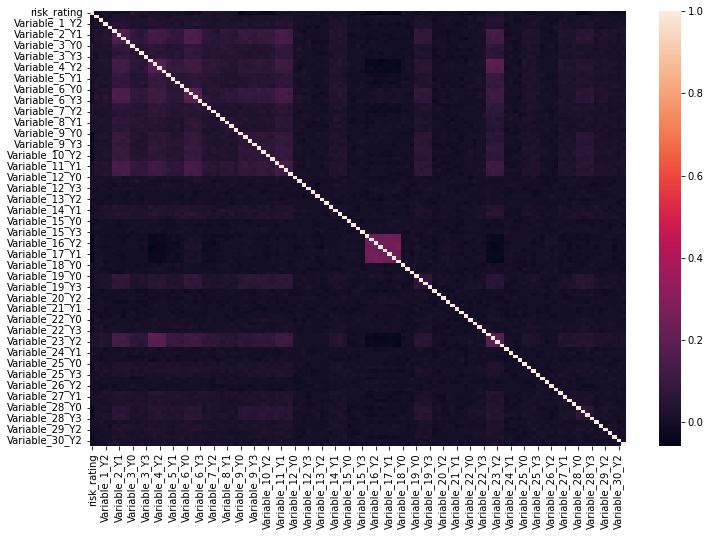

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation1)

<AxesSubplot:>

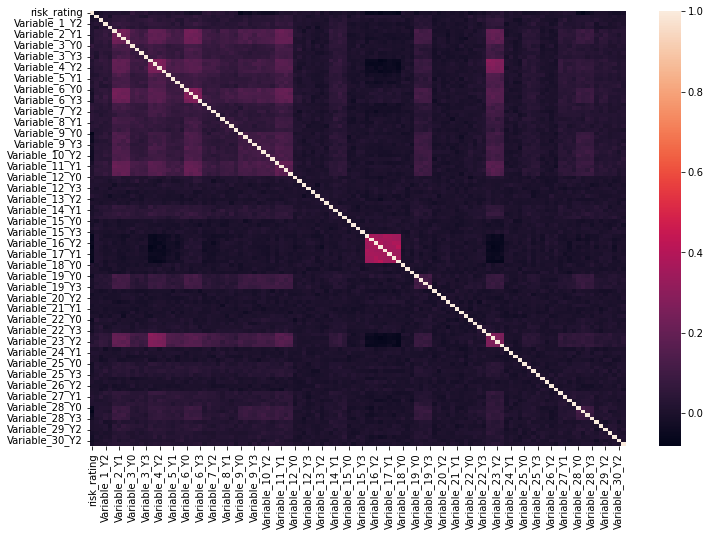

In [46]:
corelation2 = df_for_analyzing.corr(method="spearman")
plt.figure(figsize=(12,8))
sns.heatmap(corelation2)

<AxesSubplot:>

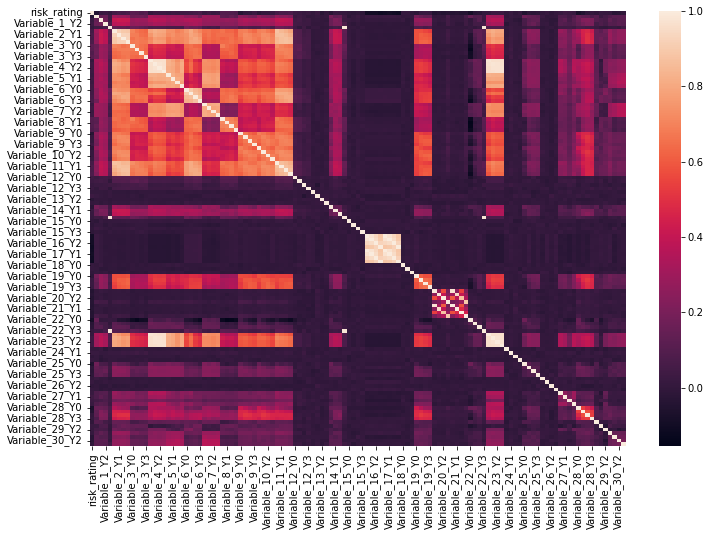

In [29]:
corelation3 = df_for_analyzing.corr(method="pearson")
plt.figure(figsize=(12,8))
sns.heatmap(corelation3)

In [54]:
sort_cor=corelation3.iloc[:,0].sort_values(ascending=False)
sort_cor

risk_rating       1.000000
Variable_3_Y0     0.118926
Variable_3_Y1     0.106236
Variable_3_Y3     0.102867
Variable_8_Y0     0.101025
                    ...   
Variable_16_Y2   -0.101310
Variable_17_Y0   -0.101571
Variable_17_Y2   -0.101801
Variable_17_Y3   -0.112698
Variable_16_Y3   -0.112702
Name: risk_rating, Length: 119, dtype: float64

In [73]:
y = df_for_analyzing['risk_rating']
x = df_for_analyzing.iloc[:,1:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0, shuffle=True)

In [77]:
scores = []
for max_depth in range(1,21):
    
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, bootstrap=True, random_state=0, oob_score=True)
    model.fit(x_train,y_train)
    scores.append(model.score(x_test,y_test))
Best_index = np.argmax(scores)+1
Best_index

12

Text(0.5, 1.0, 'choose the best max_depth via test set')

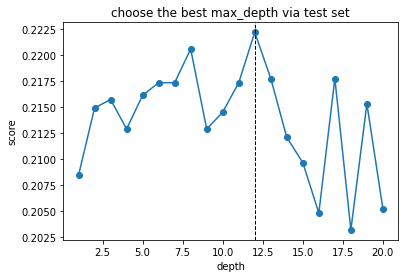

In [57]:
plt.plot(range(1,21),scores,'o-')
plt.axvline(best_index, linestyle='--',color='k',linewidth=1)
plt.xlabel('depth')
plt.ylabel('score')
plt.title('choose the best max_depth via test set')

In [58]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=12, bootstrap=True, random_state=0, oob_score=True)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.22217725617159045

In [63]:
data_over_sampling = RandomOverSampler(random_state=0)
x0,y0 = data_over_sampling.fit_resample(x,y)

In [65]:
y0.value_counts()

7     1586
4     1586
8     1586
9     1586
6     1586
5     1586
12    1586
17    1586
11    1586
10    1586
2     1586
3     1586
13    1586
14    1586
15    1586
1     1586
Name: risk_rating, dtype: int64

In [78]:
x0_train,x0_test,y0_train,y0_test=train_test_split(x0,y0,test_size=0.33,random_state=0, shuffle=True)

In [80]:
scores_new = []
for max_depth in range(1,21):
    
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, bootstrap=True, random_state=0, oob_score=True)
    model.fit(x0_train,y0_train)
    scores_new.append(model.score(x0_test,y0_test))
best_index_new = np.argmax(scores_new)+1
best_index_new

19

In [68]:
max(scores_new)

0.8213731343283582

In [81]:
## The optimal model = RandomForestClassifier(n_estimators=100, max_depth=19, bootstrap=True, random_state=0, oob_score=True)